# Seminar 1

# OpenAI Gym. Value Iteration. Policy Iteration. Tabular Q-learning

## Введение в OpenAI Gym

 <a href=https://gym.openai.com>OpenAI Gym</a> это набор инструментов для разработки и сравнения алгоритмов обучения с подкреплением.

OpenAI Gym предоставляет простой и универсальный API ко многим средам с разными свойствами, как простым так и сложным:
* Классические задачи управления и игрушечные примеры, которые можно найти в учебниках и на которых демонстрируется работа алгоритмов обучения с подкреплением (в основном они будут использоваться в этом курсе)
* Игры Atari (оказали огромное влияние на достижения в обучении с подкреплением в последние годы)
* 2D и 3D среды для контроля роботов в симуляции (используют проприетарный движок <a href=http://www.mujoco.org/>MuJoCo</a>)

Для работы нам потребуется установить gym и numpy. Gym следует установить командой pip install gym=0.9.2

In [1]:
!pip install gym==0.9.2

  Using cached gym-0.9.2.tar.gz (157 kB)
     |████████████████████████████████| 1.1 MB 3.5 MB/s eta 0:00:01
  Created wheel for gym: filename=gym-0.9.2-py3-none-any.whl size=215136 sha256=5159490635e81480663c6fe23caf98a6c6d41ddbed28dca59569c769ab8dc160
  Stored in directory: /Users/daniil/Library/Caches/pip/wheels/cd/2a/05/2c532518dfe6b921d70b9bd25572657d69bc0d4cb100db3724
Successfully built gym


In [2]:
# Импортируем необходимые библиотеки
import gym
import os
import numpy as np
import itertools
from collections import defaultdict
from gym.envs import toy_text
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython import display
%matplotlib inline

In [3]:
env = gym.make('CartPole-v0') # создаем среду CartPole-v0

[2021-03-23 17:26:43,845] Making new env: CartPole-v0
/Users/daniil/opt/anaconda3/lib/python3.8/site-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [6]:
env.reset()
for _ in range(1000):
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample()) # агент выбирает случайные действия
    if done:
        env.reset()

In [5]:
env.close() # выключим визуализацию

Вспомним элементы проблемы обучения с подкреплением <img src="./scheme.png" width=500>

OpenAI Gym предоставляет такой же интерфейс взаимодействия со средой:
* Среда в ответ на действие агента предоставляет *bservation (object)*- специфичный для конкретной среды объект, который предствляет наблюдения агента. Например, пиксели камеры, значения углов и скоростей сочленений робота или позиции агента и других объектов в среде.
* *reward (float)* - значение награды, полученной агентом в резултате совершенного действия
* *done (boolean)* - флаг обозначающий окончание эпизода. Например, эпизод заканчивается, когда шест слишком сильно отклонился или агент попал в прорубь в среде FrozenLake
* *info (dict)* - словарь, содержащий диагностическую информацию, которую можно использовать для отладки, но не для обучения агента. Обычно мы присваеваем значение *info* переменной по-умолчению *_*

Теперь, когда мы познакомились с API OpenAI Gym, посмотрим, сколько очков награды сможет в среднем получить за 100 эпизодов агент, выбирающий случайные действия.

In [ ]:
total_reward = []
env = gym.make('CartPole-v0')
for episode in range(100):
    episode_reward = 0
    # Ваш код здесь
   
        if done:
            print("Episode {} finished after {} timesteps".format(episode+1, t+1))
            break
    total_reward.append(episode_reward)

[2021-03-23 09:26:04,790] Making new env: CartPole-v0


Episode 1 finished after 21 timesteps
Episode 2 finished after 11 timesteps
Episode 3 finished after 41 timesteps
Episode 4 finished after 13 timesteps
Episode 5 finished after 69 timesteps
Episode 6 finished after 14 timesteps
Episode 7 finished after 17 timesteps
Episode 8 finished after 45 timesteps
Episode 9 finished after 14 timesteps
Episode 10 finished after 22 timesteps
Episode 11 finished after 28 timesteps
Episode 12 finished after 14 timesteps
Episode 13 finished after 17 timesteps
Episode 14 finished after 29 timesteps
Episode 15 finished after 34 timesteps
Episode 16 finished after 19 timesteps
Episode 17 finished after 15 timesteps
Episode 18 finished after 26 timesteps
Episode 19 finished after 19 timesteps
Episode 20 finished after 21 timesteps
Episode 21 finished after 16 timesteps
Episode 22 finished after 18 timesteps
Episode 23 finished after 36 timesteps
Episode 24 finished after 69 timesteps
Episode 25 finished after 18 timesteps
Episode 26 finished after 19 times

/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [ ]:
env.close()

In [ ]:
print(np.mean(total_reward))

Наш "cлучайный" агент получает в среднем 20 очков за 100 эпизодов. Не очень впечатляет(

В предыдущем эксперименте агент выбирал случайное действие. Важными объектами в OpenAI Gym являются пространства состояний и действий.

In [ ]:
env = gym.make('CartPole-v0')

In [ ]:
print(env.action_space.__doc__)

In [ ]:
print(env.action_space)

In [ ]:
print(env.action_space.n)

In [ ]:
print(env.observation_space.__doc__)

In [ ]:
print(env.observation_space)

In [ ]:
print(env.observation_space.shape)

In [ ]:
env.observation_space.high

In [ ]:
env.observation_space.low

## Value Iteration

На лекции мы рассмотрели, как мы можем выучить оптимальную политику, используя алгоритм Value Iteration, если нам известна динамика среды, а также если пространства состояний и действий не большие и дискретные.

Попробуем выучить оптимальную политику в среде <a href=https://gym.openai.com/envs/FrozenLake-v0>FrozenLake-v0</a>. Это простая среда с маленькими пространствами состояний и действий, а также с известной динамикой.

Создадим среду и выведем её описание.

In [ ]:
env = gym.make('FrozenLake-v0')

[2021-03-23 09:33:56,551] Making new env: FrozenLake-v0
/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [ ]:
print(env.env.__doc__)


    Winter is here. You and your friends were tossing around a frisbee at the park
    when you made a wild throw that left the frisbee out in the middle of the lake.
    The water is mostly frozen, but there are a few holes where the ice has melted.
    If you step into one of those holes, you'll fall into the freezing water.
    At this time, there's an international frisbee shortage, so it's absolutely imperative that
    you navigate across the lake and retrieve the disc.
    However, the ice is slippery, so you won't always move in the direction you intend.
    The surface is described using a grid like the following

        SFFF
        FHFH
        FFFH
        HFFG

    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located

    The episode ends when you reach the goal or fall in a hole.
    You receive a reward of 1 if you reach the goal, and zero otherwise.

    


Как видно среда представляет собой поле 4 на 4, по которому нужно добраться от начала (клетка *S*) до цели (клетка *G*). При этом среда является недетерменированный - с определенной вероятностью при совершения действия агент подскользнется и попадет не в ту клетку, в которую направлялся. Клетка *H* обозначает прорубь. Игра закначивается, когда агент попадает в клетку *G* или в клету *H*. Если агент проваливается в прорубь, то он получает награду *0*, если достигает клетки цели - *1*. 

Посмотрим, сколько в среднем очков награды за 100 эпизодов получит наш агент, если будет выполнять случайные действия.

In [ ]:
env.seed(0); 
from gym.spaces import prng; 
prng.seed(10) # установим сид для воспроизводимости результатов эксперимента

In [ ]:
total_reward = []
for episode in range(100):
    episode_reward = 0
    # Ваш код здесь
    
        if done:
            print("Episode {} finished after {} timesteps".format(episode+1, t+1))
            break
    total_reward.append(episode_reward)

Episode 1 finished after 2 timesteps
Episode 2 finished after 11 timesteps
Episode 3 finished after 2 timesteps
Episode 4 finished after 2 timesteps
Episode 5 finished after 2 timesteps
Episode 6 finished after 3 timesteps
Episode 7 finished after 10 timesteps
Episode 8 finished after 6 timesteps
Episode 9 finished after 2 timesteps
Episode 10 finished after 5 timesteps
Episode 11 finished after 5 timesteps
Episode 12 finished after 17 timesteps
Episode 13 finished after 5 timesteps
Episode 14 finished after 11 timesteps
Episode 15 finished after 20 timesteps
Episode 16 finished after 9 timesteps
Episode 17 finished after 11 timesteps
Episode 18 finished after 2 timesteps
Episode 19 finished after 4 timesteps
Episode 20 finished after 2 timesteps
Episode 21 finished after 4 timesteps
Episode 22 finished after 4 timesteps
Episode 23 finished after 8 timesteps
Episode 24 finished after 4 timesteps
Episode 25 finished after 2 timesteps
Episode 26 finished after 7 timesteps
Episode 27 fini

In [ ]:
plot(total_reward)

In [ ]:
print(np.mean(total_reward))

0.03


Как видим, только в 3 эпизодах из 100 агену удалось добраться до цели.

Из среды OpenAI Gym мы можем получить элементы MDP (Markov Decision Process).

В env.env.P хранится двухуровневый словарь, в котором первый ключ является состояние, а второй - действием.
Клетки ассоциированыс индексами [0, 1, 2, ..., 15] слева направо и сверху вниз.

Индексы действией [0, 1, 2, 3] соответствуют движению на Запад, Юг, Восток и Север.
env.env.P[state][action] возвращает лист кортежей (probability, nextstate, reward). Например, состояние 0 - это начальное состояние и информация о веротностях перехода для s=0 и a=0 содержит:

In [ ]:
env.env.P[1][1]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 5, 0.0, True),
 (0.3333333333333333, 2, 0.0, False)]

Другой пример - состояние 5 сооветсвует проруби, и все действия в данном состоянии приводят к тому же состоянию с вероятностью 1 и наградой 0.

In [ ]:
for i in range(4):
    print("P[5][%i] =" % i, env.env.P[5][i])

P[5][0] = [(1.0, 5, 0, True)]
P[5][1] = [(1.0, 5, 0, True)]
P[5][2] = [(1.0, 5, 0, True)]
P[5][3] = [(1.0, 5, 0, True)]


Вспомним, что из себя представляет алгоритм Value Iteration <img src="./value_iteration.png" width="500">

Задание считается решенным, если агент доходит до цели в среднем в 70% эпизодов.

Напишем несклько вспомогательных функций.

Запомним число стостояний и действий в среде.

In [ ]:
n_states = env.env.nS
n_actions = env.env.nA
print("Number of states: {}".format(n_states))
print("Number of actions: {}".format(n_actions))

Number of states: 16
Number of actions: 4


Поскольку алгоритм Value Iteration возвращает нам оптимальную V-функцию, то нам необходимо извлекать из нее оптимальную политику (как указано в последней строке псевдокода алгоритма).

In [ ]:
def extract_policy(v, gamma = 1.0):
    policy = np.zeros(n_states)
    # Ваш код здесь
    
    return policy

Также напишем функцию для оценки нашей найденной политики.

In [ ]:
def evaluate_policy(env, policy, gamma=1.0, n=100):
    total_reward = []
    for episode in range(n):
        episode_reward = 0
        # Ваш код здесь

    return 

Нам остается написать основную функцию, которая вернет оптимальную V-функцию.

In [ ]:
def value_iteration(env, gamma=1.0, max_iterations = 100000):
    v = np.zeros(n_states)
    eps = 1e-20
    # Ваш код здесь

    
      if (np.sum(np.fabs(prev_v - v)) <= eps):
          print ('Value-iteration converged at iteration# %d.' %(i+1))
          break
    return v

In [ ]:
def value_iteration(env, gamma = 1.0):
    """ Value-iteration algorithm """
    v = np.zeros(env.env.nS)  # initialize value-function
    max_iterations = 100000
    eps = 1e-20
    # Ваш код здесь

    
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
    return v

Теперь мы можем найти оптимальную V-функцию, извлечь из нее оптимальную политику и оцениь ее.

In [ ]:
# Ваш код здесь

Streaming output truncated to the last 5000 lines.
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)


In [ ]:
# Ваш код здесь

[[0.82352941 0.82352941 0.82352941 0.82352941]
 [0.82352941 0.         0.52941176 0.        ]
 [0.82352941 0.82352941 0.76470588 0.        ]
 [0.         0.88235294 0.94117647 0.        ]]


In [ ]:
# Ваш код здесь

[[0. 3. 3. 3.]
 [0. 0. 0. 0.]
 [3. 1. 0. 0.]
 [0. 2. 1. 0.]]


In [ ]:
# Ваш код здесь

0.76


По сравнению со "случайным" агентом, который доходил до цели в 3 случаях из 100, наша новая политика позволяет добирться до цели в ~70% эпизодов.

## Policy Iteration

Вспомним, что из себя представляет алгоритм Policy Iteration <img src="policy_iteration.png" width="500">

Напишем необходимые вспомогательные функции.

Начнем с основного цикла алгоритма, который вернет нам оптимальную политику.

In [ ]:
def policy_iteration(env, gamma=1.0, max_iterations = 200000):
    # Ваш код здесь

    
    return policy

Остается написать 2 функции, которые используются в основном цикле алгоритма Policy Iteration согласно псевдокоду.

In [ ]:
def compute_policy_v(env, policy, gamma=1.0, eps=1e-10):
    v = np.zeros(n_states)
    # Ваш код здесь

      if (np.sum((np.fabs(prev_v - v))) <= eps):
          break
    return v

In [ ]:
def extract_policy(v, gamma=1.0):
    policy = np.zeros(n_states)
    # Ваш код здесь

    
    return policy

Теперь мы также можем найти оптимальную V-функцию, извлечь из нее оптимальную политику и оцениь ее.

In [ ]:
optimal_policy = policy_iteration(env)
optimal_policy_score = evaluate_policy(env, optimal_policy)

Streaming output truncated to the last 5000 lines.
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  

In [ ]:
print(optimal_policy.reshape(4,4))

[[0. 3. 3. 3.]
 [0. 0. 0. 0.]
 [3. 1. 0. 0.]
 [0. 2. 1. 0.]]


In [ ]:
print(optimal_policy_score)

0.83


## Tabular Q-learning

Реализуем алгоритм Q-learning для среды CliffWalking. 

Посмотрим, что из себя представляет среда CliffWalking <img src="cliffwalking.png" width="500">

In [ ]:
env = toy_text.CliffWalkingEnv()

In [ ]:
print(env.__doc__)


    This is a simple implementation of the Gridworld Cliff
    reinforcement learning task.

    Adapted from Example 6.6 (page 145) from Reinforcement Learning: An Introduction
    by Sutton and Barto:
    http://people.inf.elte.hu/lorincz/Files/RL_2006/SuttonBook.pdf
    
    With inspiration from:
    https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py

    The board is a 4x12 matrix, with (using Numpy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center

    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward 
    and a reset to the start. An episode terminates when the agent reaches the goal.
    


Так как награда выражатеся отрицательными значениями, то фактической целью агента является как можно более быстрое преодоление пути от старта к финишу при этом ему нужно не упасть с обрыва.

Традиционно посмотрим сколько очков в среднем за 100 эпизодов сможет набрать "cлучайный" агент.

In [ ]:
total_reward = []
for episode in range(10):
    episode_reward = 0
    observation = env.reset()
    for t in range(100):
        # env.render()
        action = env.action_space.sample()
        observation, reward, done, _ = env.step(action)
        episode_reward += reward
        if done:
            print("Episode {} finished after {} timesteps".format(episode+1, t+1))
            break
    total_reward.append(episode_reward)

In [ ]:
print(np.mean(total_reward))

-1129.6


Ожидаемо, наш "случайный" агент просто блуждает по среде, не пытаясь добраться до цели.

Вспомним как выглядит реализация данного алгоритма <img src="q_learning.png" width="500">

Так как мы раелизуем табличную версию Q-learning, создадим структура, которая будет хранить значения нашей функции *Q(S,A)* для каждого состояния и действия. Она пдетставляет собой словарь (*dict*), хранящий в качестве ключей состояния, а в качестве значений массив значений *Q-функции* для каждого действия для данного ключа-состояния.

In [ ]:
Q = defaultdict(lambda: np.zeros(env.action_space.n))

print("Q-значения для состояния-действия (0, 0): %s" % Q[(0, 0)], "хранятся в списке, по значению для каждого действия")
print("Таким обарзом, Q-значение для действия 3 в в состоянии (1,2), i.e. Q((1,2), 3), можно получить вот так q_vals[(1,2)][3]:", Q[(1,2)][3])

Q-значения для состояния-действия (0, 0): [0. 0. 0. 0.] хранятся в списке, по значению для каждого действия
Таким обарзом, Q-значение для действия 3 в в состоянии (1,2), i.e. Q((1,2), 3), можно получить вот так q_vals[(1,2)][3]: 0.0


Сначала напишем функцию реализующую $\epsilon$-greedy политику для исследования среды.

In [ ]:
def eps_greedy(Q, state, epsilon):
    """
    Параметры:
        Q: таблица значений Q-функции
        epsilon: параметр эпсилон
        state: текущее состоние
    Результат:
        Случайное действие с вероятностью eps или argmax Q(s, .) c вероятностью (1 - eps)
    """
    # Ваш код здесь


Также напишем функцию, которая поможет нам оценить, как ведет себя обученный агент.

In [ ]:
def q_eval(Q, render=False):
    total_reward = []
    for i_episode in range(10):
        episode_reward = 0
        # Ваш код здесь

        
    return np.mean(total_reward)

Теперь реализуем функцию обучения агента (обновления значений Q-функции) с использование функции, реализующей $\epsilon$-greedy политику.

In [ ]:
def q_learning(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """    
    Параменты:
        env: среда Open AI
        num_episodes: Количество эпизодов
        discount_factor: фактор дисконтирования
        alpha: константа обучения
        epsilon: параметр эпсилон для ϵ-greedy политику
    
    Результат:
        Таблица с оптимальными значениями Q-функции
    """
    # Ваш код здесь
    
    return Q, episode_lengths, episode_rewards

In [ ]:
env = toy_text.CliffWalkingEnv()

In [ ]:
Q, episode_lengths, episode_rewards = q_learning(env, 500)

Episode 100/500 score = -100.0.
Episode 200/500 score = -100.0.
Episode 300/500 score = -100.0.
Episode 400/500 score = -100.0.
Episode 500/500 score = -100.0.


In [ ]:
score = q_eval(Q)

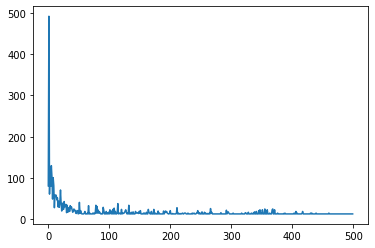

In [ ]:
plt.plot(episode_lengths)

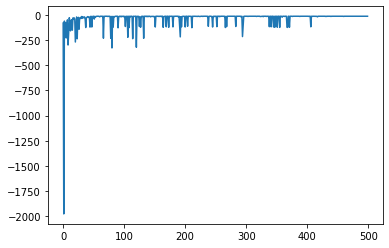

In [ ]:
plt.plot(episode_rewards)